# Google Play store sentiment analysis

In [83]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
df=pd.read_csv('user_reviews.csv.txt')
df.head()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


[nltk_data] Downloading package vader_lexicon to C:\Users\Sabin
[nltk_data]     Sapkota\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [84]:
df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [85]:
df.shape

(64295, 5)

In [86]:
# columns with missing value
[col for col in df.columns if df[col].isnull().any()]

['Translated_Review',
 'Sentiment',
 'Sentiment_Polarity',
 'Sentiment_Subjectivity']

In [87]:
# to see value
df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [88]:
# unique element in each column
df.apply(lambda x:len(x.unique()))

App                        1074
Translated_Review         27995
Sentiment                     4
Sentiment_Polarity         5411
Sentiment_Subjectivity     4475
dtype: int64

In [90]:
#fillna with forward fill method
def fillna(col):
    return df[col].fillna(method='ffill')
    
    

In [91]:
#passing function in three columns to fill na value 
df.Sentiment=fillna('Sentiment')
df.Sentiment_Polarity=fillna('Sentiment_Polarity')
df.Sentiment_Subjectivity =fillna('Sentiment_Subjectivity')


In [92]:
# In review columns we fillna value with not mentioned
df.Translated_Review=df.Translated_Review.fillna('NOT MENTIONED')

In [93]:
#after applying function,lets check again na value
df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [94]:
#performing sentiment analysis of three columns,and giving them three seoarate columns positive,negative, and neutral
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Translated_Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Translated_Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Translated_Review"]]



In [95]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Positive,Negative,Neutral
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.534,0.0,0.466
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.519,0.0,0.481
2,10 Best Foods for You,NOT MENTIONED,Positive,0.25,0.288462,0.000,0.0,1.000
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.451,0.0,0.549
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.677,0.0,0.323


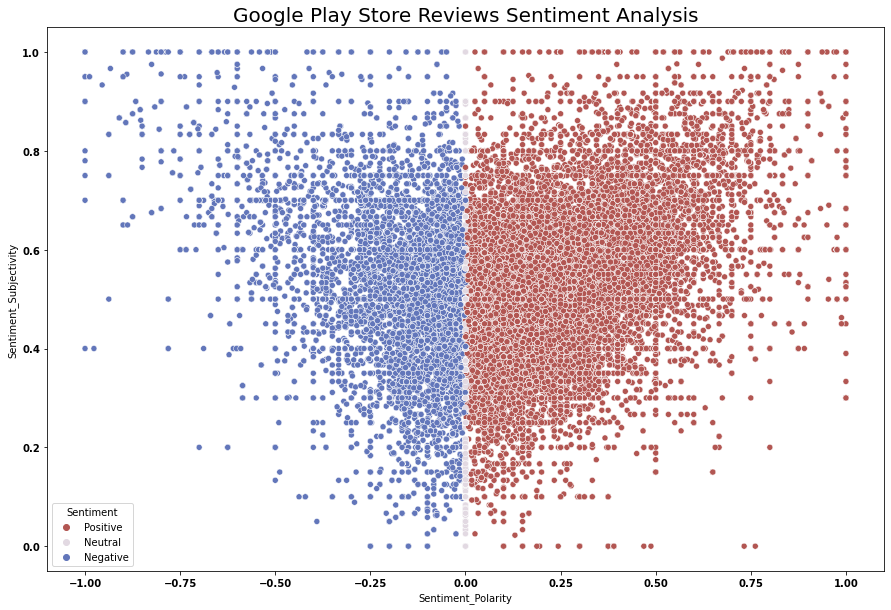

In [99]:
#Google Play Store Reviews Sentiment Analysis using scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.scatterplot(df['Sentiment_Polarity'], df['Sentiment_Subjectivity'], 
                hue = df['Sentiment'], edgecolor='white', palette="twilight_shifted_r")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold');


In [ ]:
So, from above plot we can see more or less  same sentiment for positive and negative for goole play store reviews 